### Random Project about Indian Migration History


## Some Psuedo Code for how this project is going to work.
I want to know the following: Since the 1960s many Indian people have immigrated to various locations across the globe. Having grown up in this diaspora I was completley unaware of the depth to which it existed before leaving North America and going to work in Tanzania where I found a sizeable Indian population. This was seen as a normal phenomena to those who were already educated in this diaspora. The counter point to this was when I reached Denmark and started living there - Indian people were incredibly scarce! Why is it that some Indian people ended up in some parts of the world in incredible excess (USA, Canada, United Kingdom, East Africa, etc.) but then were incredibly scarce in others (Scandinavia). The twist was that within Scandinavia there was a sizeable Pakistani population meaning that it was not a cultural difference as both pakistani and indian cultures are incredibly similar as we all come from the same corner of the world. With this in mind, I would like this project to do a handful of things.


1.) Demonstrate the number of Indians that have immigrated to various countries over 40 years with the assumption that these individuals have landed in a new country and stayed put.


2.) Given the current trend that has been seen with Indian migration, what would be the expected Indian population in each country in the next 20 years as more indians migrate out of India. (Model Creation)

In [127]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns


In [128]:
df = pd.read_csv('IndianMigrationHistory1.3.csv')

In [129]:
df = df.rename(columns={'Country Origin Name':'India', 'Country Origin Code':'IND', 'Migration by Gender Name':'Gender',
                  'Migration by Gender Code':'MAL_FEM', 'Country Dest Name':'Country','Country Dest Code':'Country_Abbreviation',
                  '1960 [1960]': 'Sixties','1970 [1970]':'Seventies','1980 [1980]':'Eighties','1990 [1990]':'Nineties',
                  '2000 [2000]':'Two_Thousands'})

In [130]:
df = df.drop([39,96,107,137,179,270,327,338,368,410])

In [131]:
df = df.reset_index()

In [132]:
df['Sixties'] = pd.to_numeric(df['Sixties'])
df['Seventies'] = pd.to_numeric(df['Seventies'])
df['Eighties'] = pd.to_numeric(df['Eighties'])
df['Nineties'] = pd.to_numeric(df['Nineties'])
df['Two_Thousands'] = pd.to_numeric(df['Two_Thousands'])

In [133]:
df['Total_Indian_Population'] = df['Sixties'] + df['Seventies'] + df['Eighties'] + df['Nineties'] + df['Two_Thousands']

In [150]:
df.head(5)

,index,India,IND,Gender,MAL_FEM,Country,Country_Abbreviation,Sixties,Seventies,Eighties,Nineties,Two_Thousands,Total_Indian_Population
0,0,India,IND,Female,FEM,Afghanistan,AFG,9521,11578,2872,2234,4445,30650
1,1,India,IND,Female,FEM,Albania,ALB,1,2,2,2,2,9
2,2,India,IND,Female,FEM,Algeria,DZA,6,2,2,1,0,11
3,3,India,IND,Female,FEM,American Samoa,ASM,0,0,2,3,4,9
4,4,India,IND,Female,FEM,Andorra,AND,2,13,3,6,8,32


In [147]:
df_fem = df.iloc[:225:]
df_mal = df.iloc[226::]

In [149]:
df_fem.shape,df_mal.shape

((225, 13), (226, 13))

In [153]:
df_fem.Total_Indian_Population.sort_values()

148          0
169          0
165          0
13           0
196          0
9            0
171          0
64           0
72           0
215          0
131          0
90           0
100          0
206          0
201          0
18           0
149          1
63           2
208          2
180          2
221          2
113          3
166          4
168          5
170          5
6            5
207          6
134          6
68           7
154          7
210          7
130          8
126          8
45           8
3            9
1            9
188         10
77          10
114         11
2           11
145         12
186         12
124         12
135         12
102         12
48          13
83          13
172         14
108         14
181         14
54          15
37          16
35          16
179         17
61          18
123         18
78          18
81          19
220         20
58          24
69          26
106         29
4           32
85          34
46          38
56          38
214       

In [157]:
df_fem = df_fem.set_index('Country')
df_mal = df_mal.set_index('Country')

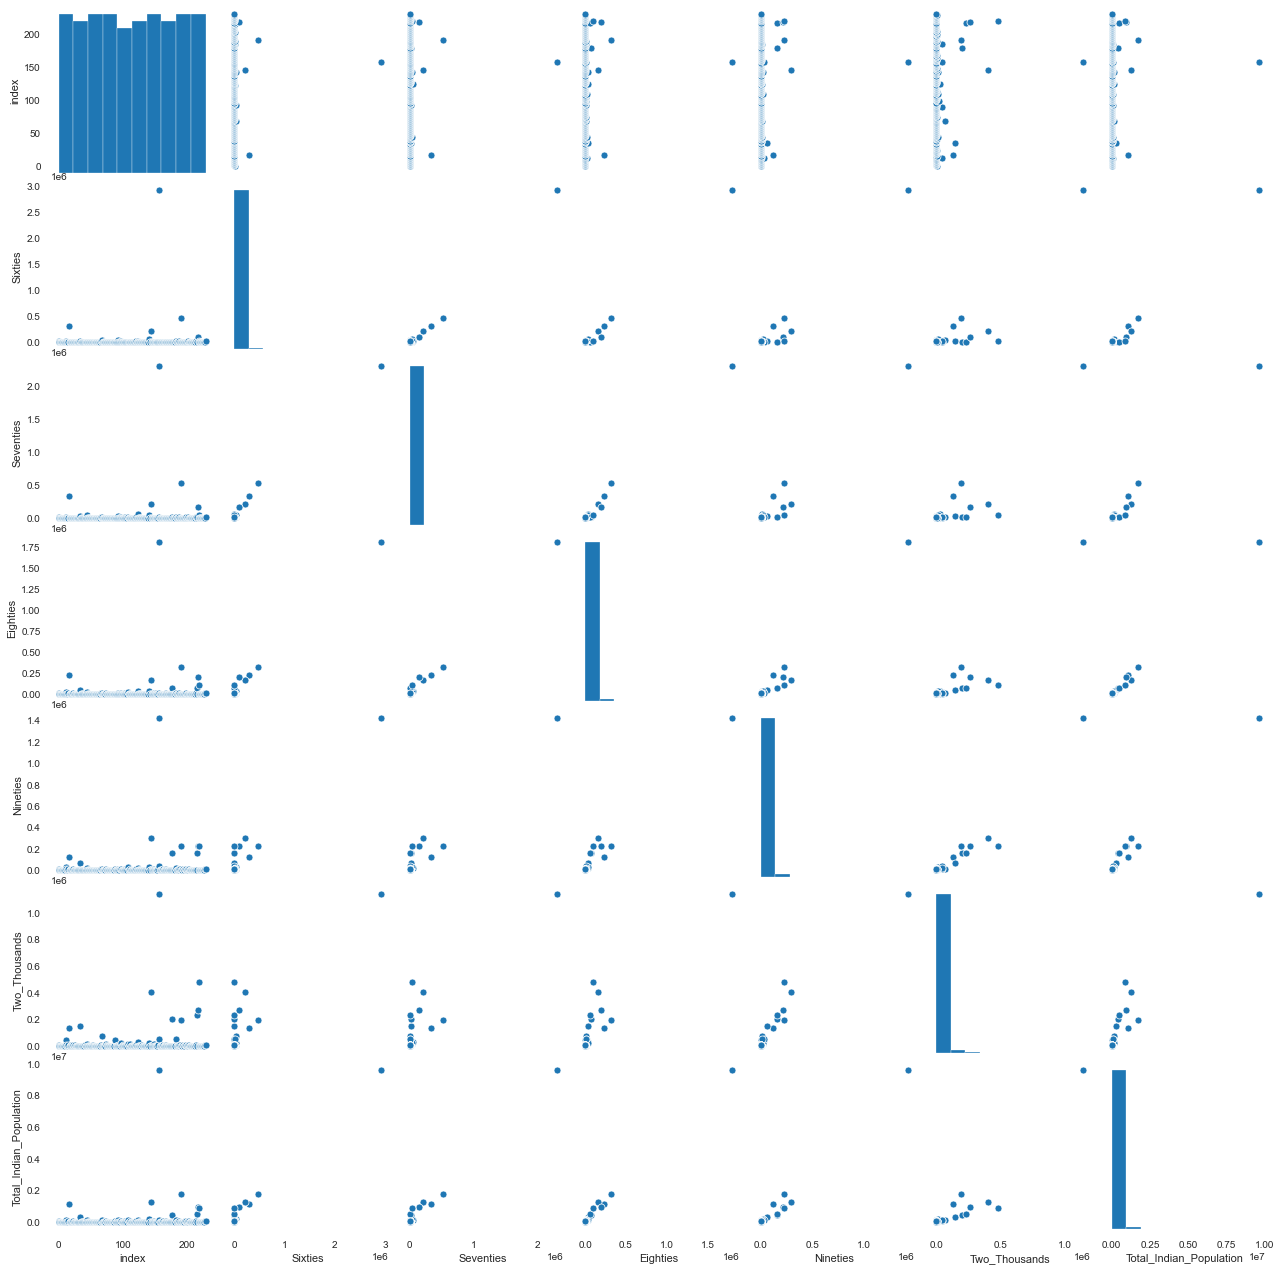

In [164]:
sns.pairplot(df_fem)